# Demonstrations of NBody_Reader Functionality

 - This notebook contains a mixture of demos of finished code, as well as WIP experimentation with ways to speed-up the code 

In [1]:
import time
import numpy as np
import scipy.stats as stats
import math
import random
from collections import defaultdict
import os
import sys
from collections import Counter
import glob 
import warnings
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import importlib
from astropy.time import Time

# -------------------------------------------------------------------------------------
# Local imports
# -------------------------------------------------------------------------------------
sys.path.append( os.path.join(os.path.dirname(os.getcwd() ), 'orbit_cheby')  )
import nbody_reader 
import orbit_cheby
importlib.reload(nbody_reader)
importlib.reload(orbit_cheby)


<module 'orbit_cheby' from '/Users/matthewjohnpayne/opt/anaconda3/lib/python3.7/site-packages/orbit_cheby/__init__.py'>

# Demonstrate some aspects of the nbody_reader routine 
 - The "nbody_reader" routine is intended purely to facilitate the reading of nbody-output data that has been saved to file 
 - This is intended to keep the rest of the orbit_cheby routine isolated from whatever nbody routine (e.g. "REBOUND") that we use to create the data
 - It is expected that we have something like cartesian-states (and covariance data) output at an array of times (e.g. daily)

##### txt
 - Here we use a function to generate some synthetic data
 - In this *WIP* version I use a txt file containing structured columns of data


In [2]:
importlib.reload(nbody_reader)

# Set up a filepath (to be created)
text_filepath = os.path.join(os.path.dirname(os.getcwd() ), 'dev_data', '2022AA_demo.txt')

# Use convenience func in nbody_reader to create a text file 
nbody_reader.create_nbody_txt(text_filepath)
assert os.path.isfile(text_filepath)

 - Here we use the functionality in "nbody_reader" to read from a txt file and return the stored data
 - In this case the data is the synthetic positions (and other components) created above 

2022 AA


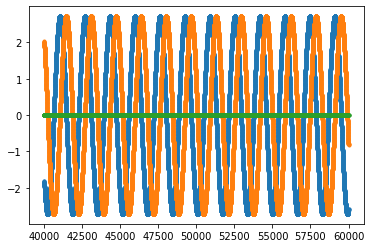

In [7]:
# read the file into an array
name,  times,   states = nbody_reader.parse_nbody_txt(text_filepath)
print( name ) 

# plot some of the coordinates 
_ =plt.plot(times,states[:,0] , '.')
_ =plt.plot(times,states[:,1] , '.')
_ =plt.plot(times,states[:,2] , '.')
